In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
sns.set(style="whitegrid", color_codes=True)

In [4]:
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


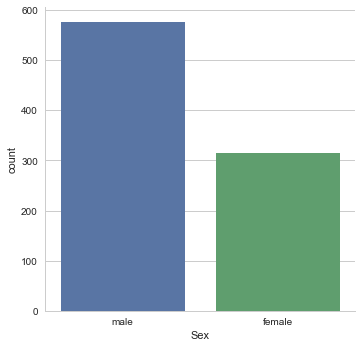

In [6]:
sns.factorplot(x='Sex',data = train,size=5,aspect=1,kind='count')

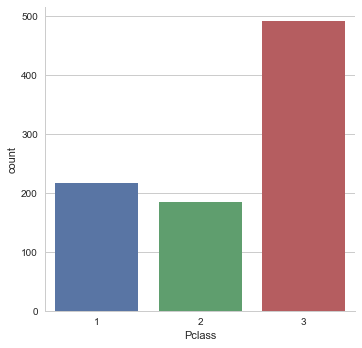

In [7]:
sns.factorplot(x='Pclass',data = train,size=5,aspect=1,kind='count')

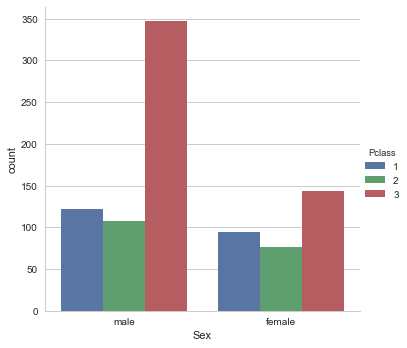

In [8]:
sns.factorplot(x='Sex',data = train,size=5,aspect=1,kind='count',hue='Pclass')

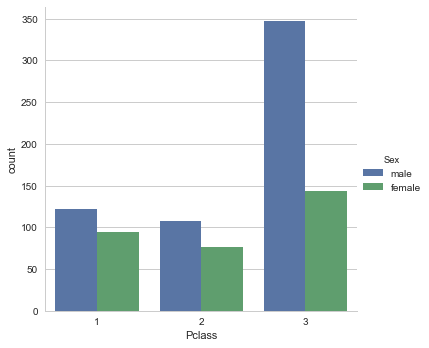

In [9]:
sns.factorplot(x='Pclass',data = train,size=5,aspect=1,kind='count',hue='Sex')

In [19]:
def male_female_child(passenger):
#     print(type(passenger))
    age,sex = passenger
    if(age<16):
        return 'child'
    else:
        return sex

In [20]:
train['person'] = train[['Age','Sex']].apply(male_female_child,axis=1)

In [21]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


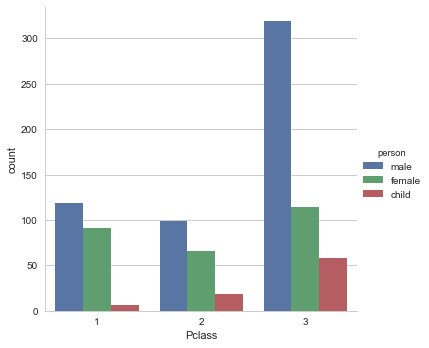

In [22]:
sns.factorplot(x='Pclass',data = train,size=5,aspect=1,kind='count',hue='person')

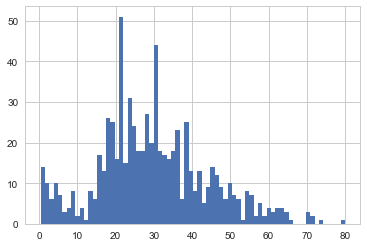

In [25]:
train['Age'].hist(bins=70)

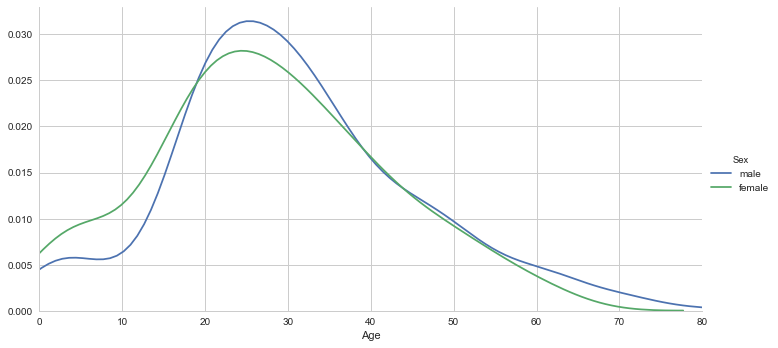

In [43]:
fig = sns.FacetGrid(train,hue='Sex',aspect=2,size=5)
fig.map(sns.kdeplot,'Age')
oldest = train['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

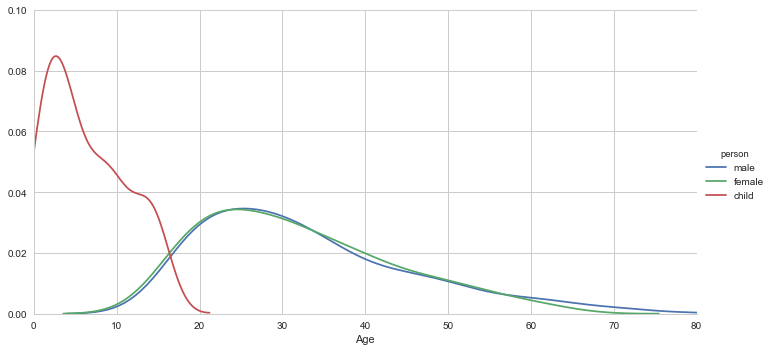

In [42]:
fig = sns.FacetGrid(train,hue='person',aspect=2,size=5)
fig.map(sns.kdeplot,'Age')
oldest = train['Age'].max()
fig.set(xlim=(0,oldest),ylim=(0,0.1))
fig.add_legend()

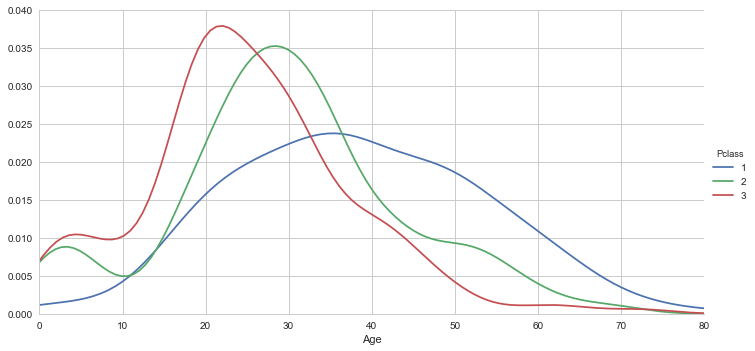

In [38]:
fig = sns.FacetGrid(train,hue='Pclass',aspect=2,size=5)
fig.map(sns.kdeplot,'Age')
oldest = train['Age'].max()
fig.set(xlim=(0,oldest),ylim=(0,0.040))
fig.add_legend()

In [46]:
levels = []
for level in (train['Cabin'].dropna()):
    levels.append(level[0])

cabin_df = pd.DataFrame(data=levels,columns=['cabin'])
cabin_df.head()

,cabin
0,C
1,C
2,E
3,G
4,C


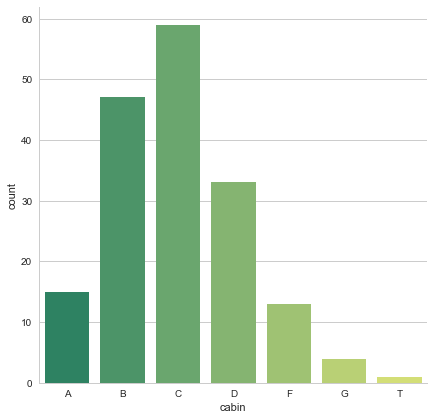

In [55]:
sns.factorplot(x='cabin',data = cabin_df,size=6,aspect=1,kind='count',palette='summer',order=['A','B','C','D','F','G','T'])

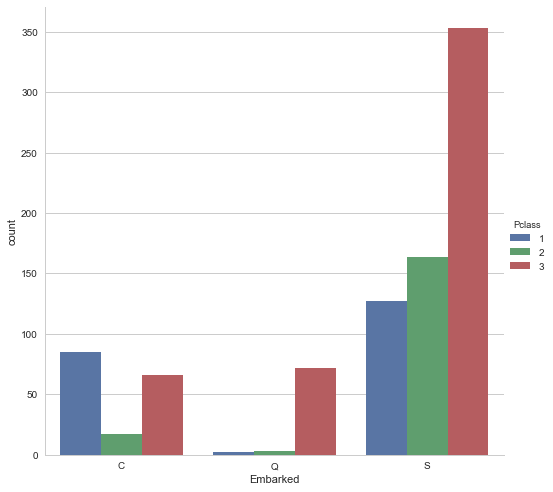

In [60]:
sns.factorplot(x='Embarked',data=train,kind='count',size=7,aspect=1,hue='Pclass',order=['C','Q','S'])

In [61]:
def have_family(passenger):
    sibsp,parch = passenger
    if(sibsp+parch>0):
        return 'family'
    else:
        return 'alone'

In [63]:
train['Alone'] = train[['SibSp','Parch']].apply(have_family,axis=1)

In [64]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,alone


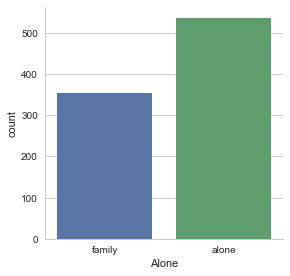

In [66]:
sns.factorplot(x='Alone',data=train,kind='count')

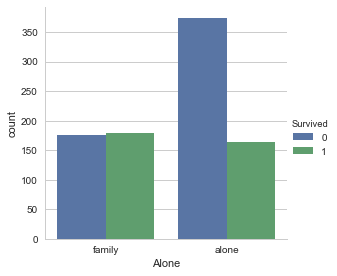

In [67]:
sns.factorplot(x='Alone',data=train,kind='count',hue='Survived')

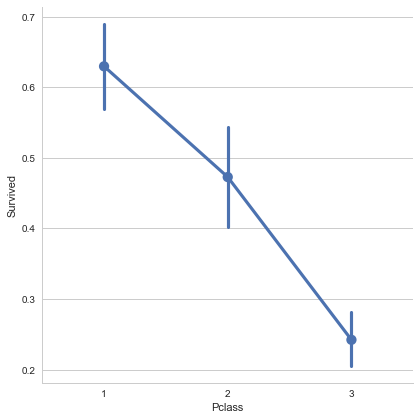

In [71]:
sns.factorplot(x='Pclass',y='Survived',data=train,size=6,aspect=1)

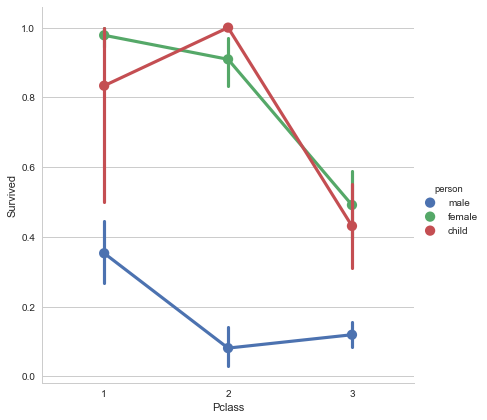

In [72]:
sns.factorplot(x='Pclass',y='Survived',data=train,size=6,aspect=1,hue='person')

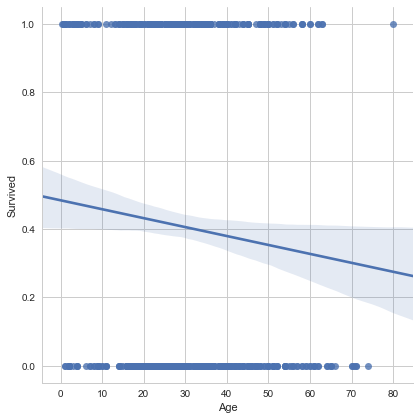

In [74]:
sns.lmplot(x='Age',y='Survived',data=train,size=6,aspect=1)

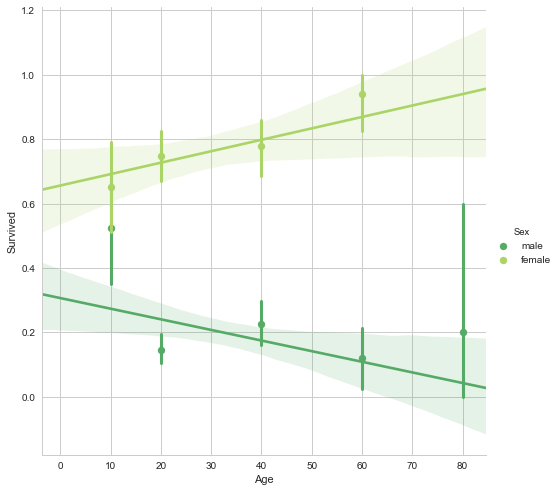

In [76]:
sns.lmplot(x='Age',y='Survived',hue='Sex',data=train,palette='summer',x_bins=[10,20,40,60,80],size=7,aspect=1)

In [79]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'person', 'Alone'],
      dtype='object')

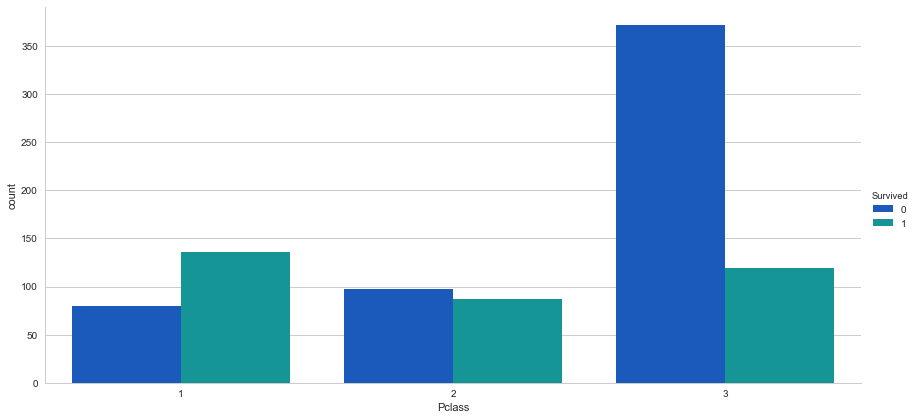

In [95]:
sns.factorplot(x='Pclass',data=train,palette='winter',hue='Survived',kind='count',size=6,aspect=2)

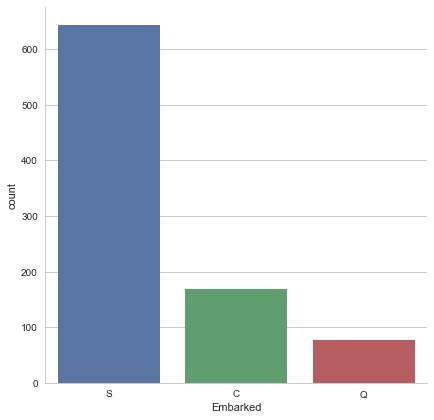

In [120]:
sns.factorplot(x='Embarked',data = train,size=6,aspect=1,kind='count')

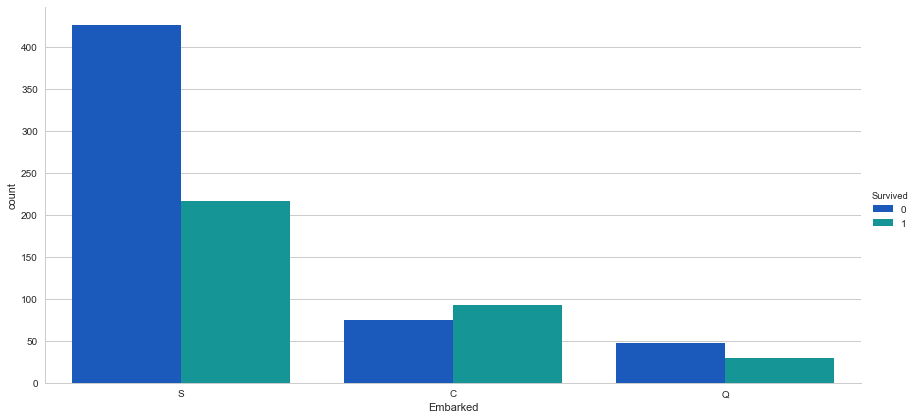

In [96]:
sns.factorplot(x='Embarked',data=train,palette='winter',hue='Survived',kind='count',size=6,aspect=2)

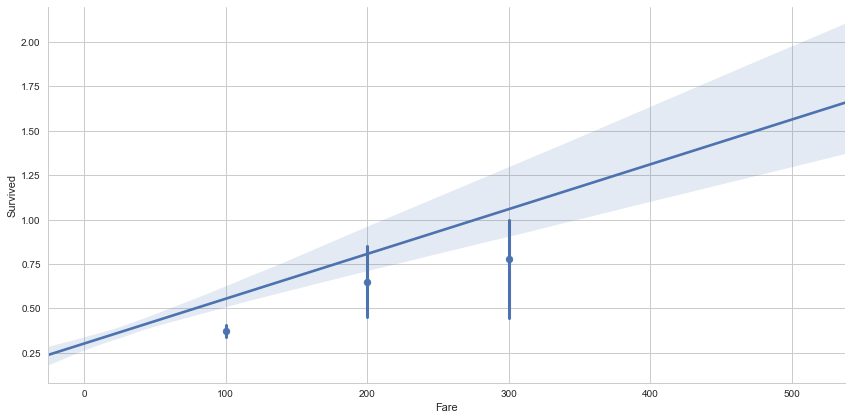

In [106]:
sns.lmplot(x='Fare',data=train,palette='winter',y='Survived',size=6,aspect=2,x_bins=[100,200,300])

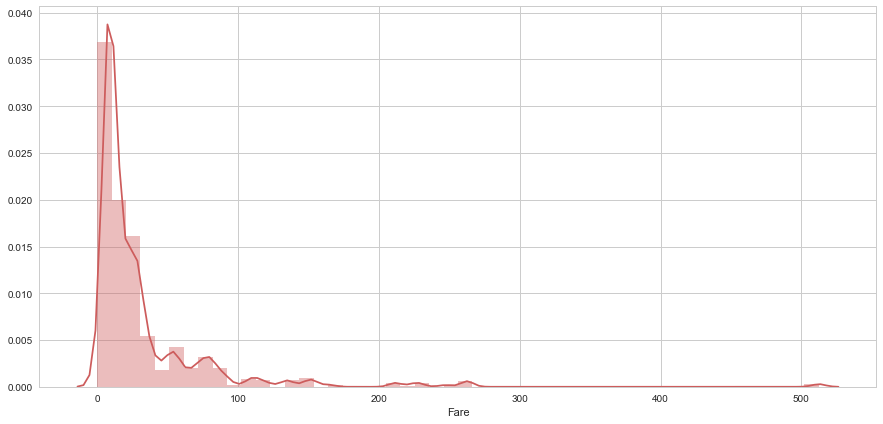

In [119]:
plt.figure(figsize=(15,7))
sns.distplot(train['Fare'],color='indianred')